In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Laod Data Set

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,710.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.603169,0.522552,0.380638,31.431149
std,257.212740,0.487387,14.566894,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,38.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


##***Handling Missing values***
**Drop Cabin Column(has many null values)**

In [7]:
df.drop(columns='Cabin', inplace=True)

In [8]:
print("\n After dropping Cabin Column")
df.isnull().sum()


 After dropping Cabin Column


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


After dropping Cabin Column
**Fill `Age`, `Embarked`, `Fare` Columns**


In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].mode())

In [10]:
print("\n After filling missing values")
df.isnull().sum()


 After filling missing values


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,18


After filling missing values

In [11]:
print("\n After filling missing values")
df.describe()


 After filling missing values


,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,909.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.252200,0.522552,0.380638,31.431149
std,257.212740,0.487387,12.889112,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,35.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


After filling missing values
##***Outlier Handling***

In [12]:
num_cols = ['Age']
for col in num_cols:
  Q1 =df[col].quantile(0.25)
  Q3 =df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

**Visualizing after Outlier Handling**

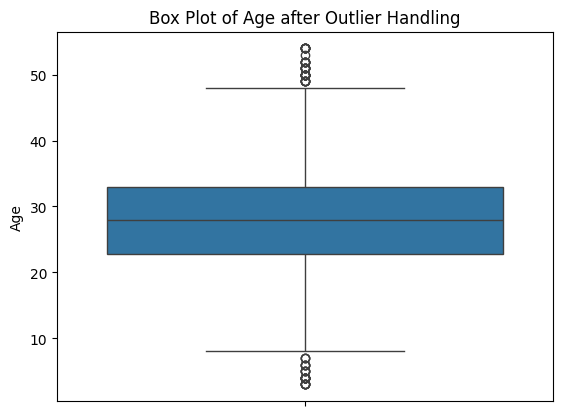

In [13]:
sns.boxplot(data=df['Age'])
plt.title('Box Plot of Age after Outlier Handling')
plt.show()

##***Detecting Duplicate data values***

In [14]:
# Backup the original df (data set)
df_copy = df.copy()

In [15]:
df.duplicated().sum()

np.int64(10)

In [16]:
df.duplicated(subset=['PassengerId']).sum()

np.int64(18)

In [17]:
df.duplicated(subset=['Name']).sum()

np.int64(17)

In [18]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
904,False
905,False
906,True
907,False


**Drop if there is duplicate**

In [19]:
df = df.drop_duplicates() #Remove all duplicate if there is
# df = df.drop_duplicates(subset=['PassengerId']) #Remove all duplicate if there is
# df = df.drop_duplicates(subset=['Name']) #Remove all duplicate if there is

In [20]:
df.duplicated().sum()

np.int64(0)

##***Correcting inconsistent data***

In [21]:
df['Sex'] = df['Sex'].replace('Female', 'female')

In [22]:
df['Pclass'] = df['Pclass'].replace('3rd', '3')